# DOG BREED IDENTIFICATION TASK

# 1. Problem Statement

* We are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal is to create a classifier capable of determining a dog's breed from a photo. The list of breeds is as follows

# 2. Task Description

* Who's a good dog? Who likes ear scratches? Well, it seems those fancy deep neural networks don't have all the answers. However, maybe they can answer that ubiquitous question we all ask when meeting a four-legged stranger: what kind of good pup is that?

* In this Task, we were provided a strictly canine subset of ImageNet in order to practice fine-grained image categorization. How well we can tell our Norfolk Terriers from our Norwich Terriers? With 120 breeds of dogs and a limited number training images per class, we might find the problem more, err, ruff than we anticipated.

# 3. Dog Breed Names

affenpinscher
afghan_hound
african_hunting_dog
airedale
american_staffordshire_terrier
appenzeller
australian_terrier
basenji
basset
beagle
bedlington_terrier
bernese_mountain_dog
black-and-tan_coonhound
blenheim_spaniel
bloodhound
bluetick
border_collie
border_terrier
borzoi
boston_bull
bouvier_des_flandres
boxer
brabancon_griffon
briard
brittany_spaniel
bull_mastiff
cairn
cardigan
chesapeake_bay_retriever
chihuahua
chow
clumber
cocker_spaniel
collie
curly-coated_retriever
dandie_dinmont
dhole
dingo
doberman
english_foxhound
english_setter
english_springer
entlebucher
eskimo_dog
flat-coated_retriever
french_bulldog
german_shepherd
german_short-haired_pointer
giant_schnauzer
golden_retriever
gordon_setter
great_dane
great_pyrenees
greater_swiss_mountain_dog
groenendael
ibizan_hound
irish_setter
irish_terrier
irish_water_spaniel
irish_wolfhound
italian_greyhound
japanese_spaniel
keeshond
kelpie
kerry_blue_terrier
komondor
kuvasz
labrador_retriever
lakeland_terrier
leonberg
lhasa
malamute
malinois
maltese_dog
mexican_hairless
miniature_pinscher
miniature_poodle
miniature_schnauzer
newfoundland
norfolk_terrier
norwegian_elkhound
norwich_terrier
old_english_sheepdog
otterhound
papillon
pekinese
pembroke
pomeranian
pug
redbone
rhodesian_ridgeback
rottweiler
saint_bernard
saluki
samoyed
schipperke
scotch_terrier
scottish_deerhound
sealyham_terrier
shetland_sheepdog
shih-tzu
siberian_husky
silky_terrier
soft-coated_wheaten_terrier
staffordshire_bullterrier
standard_poodle
standard_schnauzer
sussex_spaniel
tibetan_mastiff
tibetan_terrier
toy_poodle
toy_terrier
vizsla
walker_hound
weimaraner
welsh_springer_spaniel
west_highland_white_terrier
whippet
wire-haired_fox_terrier
yorkshire_terrier

# 4. Data Set Description

Reference: https://www.kaggle.com/c/dog-breed-identification
1. train.zip - the training set, you are provided the breed for these dogs
2. test.zip - the test set, you must predict the probability of each breed for each image
3. sample_submission.csv - a sample submission file in the correct format
4. labels.csv - the breeds for the images in the train set

# 5. Solution using Convolutional Neural Networks witH Keras

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
from os import listdir
from os.path import basename,join,exists
import os
print(listdir("../input"))
import threading
from queue import Queue
from math import floor
import time
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
# Any results you write to the current directory are saved as output.

['labels.csv', 'train', 'test', 'sample_submission.csv']


In [2]:
df = pd.read_csv('../input/sample_submission.csv')
train_dir_path = "../input/train"
test_dir_path = "../input/test"
#pickled_dir_path  = "../output/pickled_Data"
labels_df = pd.read_csv('../input/labels.csv')
dog_breeds = list(df.columns[1:])
print(len(dog_breeds))
print(dog_breeds)

120
['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', '

In [3]:
train_img_fpaths = [ join(train_dir_path, f) for f in listdir(train_dir_path)]
test_img_fpaths = [join(test_dir_path, f) for f in listdir(test_dir_path)]
print(len(train_img_fpaths))
print(len(test_img_fpaths))

10222
10357


In [4]:
def dog_breed_from_id(dog_id):
    #labels_df = pd.read_csv('../input/labels.csv')
    return labels_df[labels_df['id'] ==dog_id]['breed'].values

In [5]:
import cv2 as cv
import numpy as np

In [6]:
# variables 
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_CHANNELS = 3
BATCH_SIZE = 500
lock = threading.Lock()

In [7]:
def img_to_array(img_path):   
    img_array = cv.imread(img_path)
    img_array = cv.resize(img_array, (IMG_HEIGHT, IMG_WIDTH))
    img_array = img_array.reshape(-1,IMG_HEIGHT,IMG_WIDTH, IMG_CHANNELS)
    return img_array

In [8]:
# initialize queue which is threadsafe 
def initialize_queue():
    queue =Queue()
    return queue

In [9]:
# get list of image ids from names of test images
def get_test_image_ids():
    return [basename(fpath).split('.')[0] for fpath in test_img_fpaths]

In [10]:
# converts image files to numpy array and based on train/test, return train array and labels,
def get_data(is_train):
    # 1 batch per thread and last thread with remaining images
    img_fpaths = train_img_fpaths if is_train else test_img_fpaths
    num_threads = floor(len(img_fpaths)/BATCH_SIZE)
    print("num of threads:", num_threads + 1)
    img_array = None
    queue = initialize_queue()
    results = []          # results from multiple threads
    print("getting training data....") if is_train else print("getting testing data....")
    
    # load queue with data for each task
    for batch_index in range(num_threads + 1):
        if batch_index == num_threads:
            file_batch = img_fpaths[(batch_index*BATCH_SIZE):]
        else:
            file_batch = img_fpaths[(batch_index*BATCH_SIZE) : (batch_index + 1)*BATCH_SIZE]
        queue.put(file_batch)
    
    # iterate over loop to create threads
    for thread_index in range(num_threads+1):
        thread = threading.Thread(target = get_train_data_parallely, args=(queue, results)) if is_train else threading.Thread(target =get_testing_data_parallely, args =(queue, results))    
        thread.start()
        print("{} started".format(thread.name))
       # worker_threads.append(thread)
        
    # when queue in empty
    queue.join()
    return results

In [11]:
# convert training data into list of tuples
# this subroutine represents a task for child thread to collect training data
def get_train_data_parallely(queue, results):
    result = []
    while not queue.empty():
        fpaths = queue.get()
        for f_path in fpaths:
            img_array = img_to_array(f_path)
            # train_img_array = img_array if train_img_array is None else np.vstack((train_img_array, img_array))
            img_name = basename(f_path)
            img_id = img_name.split('.')[0]
            dog_breed = dog_breed_from_id(img_id)
            #train_labels.append(dog_breed)
            results.append((img_array, dog_breed))
            
    # append arr,labels for current task to results
    print("{} finished".format(threading.currentThread().getName()))
    # signal for task has been done
    queue.task_done()

In [12]:
# worker job for converting test imgs to array
def get_testing_data_parallely(queue, results):
    while not queue.empty():
        file_batch = queue.get()
        for f_path in file_batch:        
            img_name = basename(f_path)
            img_id = img_name.split('.')[0]
            results.append((img_id, img_to_array(f_path)))
    print("{} finished".format(threading.currentThread().getName()))
    queue.task_done()

In [13]:
# method for getting training data
def get_training_data():
    train_results = get_data(is_train = True)
    train_labels = []
    img_arrays= []
    for u_index in range(len(train_results)):
        img_arr, identified_breed = train_results[u_index]
        img_arrays.append(img_arr)
        train_labels.append(identified_breed)
    train_arr = np.array(img_arrays).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    train_arr = train_arr/255
    train_labels = one_hot_encode_labels(train_labels)
    return train_arr,train_labels

In [14]:
# method for getting testing arr
def get_testing_data():
    results = get_data(is_train = False)
    test_img_ids = []
    test_img_list = []
    for test_result in results:
        img_id, img_arr = test_result
        test_img_list.append(img_arr)
        test_img_ids.append(img_id)
    test_img_arr = np.array(test_img_list).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    test_img_arr = test_img_arr/255
    return test_img_arr, test_img_ids

In [15]:
def save_obj_to_disk(fname, obj):
    print("saving "+ fname +" to filesystem")
    if  exists(fname):
        print(fname + "already exists") 
    with open(fname, 'wb') as f:
        pickle.dump(obj, f)

In [16]:
def load_obj_from_disk(fname):
    if exists(fname):
        print("loading "+fname + " from filesystem")
        obj = None
        with open(fname, 'rb') as f:
            obj = pickle.load(f)
        return obj
    else:
        print(fname + "doesnt not exists")

In [17]:
def load_train_test_data(load_train=False, load_test=False, one_hot_encode=False):
    train_arr = None
    train_labels = None
    test_arr = None
    
    # check if training data and labels exists already as pickled file
    if load_train:
        if exists("train_data.pickle") and exists("train_labels.pickle"):
            train_arr = load_obj_from_disk("train_data.pickle")
            train_labels = load_obj_from_disk("train_labels.pickle")
            if one_hot_encode:
                train_labels = one_hot_encode_labels(train_labels)
        else:
            # create training_data and save it to filesystem
            train_arr, train_labels = get_data(is_train= True)
            if not exists("train_data.pickle"):
                save_obj_to_disk("train_data.pickle", train_data)
            if not exists("train_labels.pickle"):
                save_obj_to_disk("train_labels.pickle", train_labels)
        print(" train array shape : {}, train array labels: {}".format(train_data.shape,len(train_labels)))
        
    # check if testing data and labels exists already as pickled file
    if load_test:
        if exists("test_data.pickle"):
            test_arr = load_obj_from_disk("test_data.pickle")
        else:
            # create test_data and save it to filesystem
            test_arr = get_data(is_train= False)
            save_obj_to_disk("test_data.pickle", test_arr)
        print(" test array shape : {}".format(test_arr.shape))
    return train_arr, train_labels, test_arr

In [18]:
# method for onehot encoding labels of train_arr
def one_hot_encode_labels(label_arr):
    from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
    labelEncoder = LabelEncoder()
    integer_encoded = labelEncoder.fit_transform(np.array(label_arr))
    integer_encoded = integer_encoded.reshape(-1,1)
    onehotEncoder = OneHotEncoder()
    onehot_encoded_arr = onehotEncoder.fit_transform(integer_encoded).toarray()
    return onehot_encoded_arr

In [19]:
train_x, train_y =get_training_data()

num of threads: 21
getting training data....
Thread-5 started
Thread-6 started
Thread-7 started
Thread-8 started
Thread-9 started
Thread-10 started
Thread-11 started
Thread-12 started
Thread-13 started
Thread-14 started
Thread-15 started
Thread-16 started
Thread-17 started
Thread-18 started
Thread-19 started
Thread-20 started
Thread-21 started
Thread-22 started
Thread-23 started
Thread-24 started
Thread-25 started
Thread-25 finished
Thread-14 finished
Thread-8 finished
Thread-10 finished
Thread-13 finished
Thread-17 finished
Thread-16 finished
Thread-9 finished
Thread-19 finished
Thread-22 finished
Thread-18 finished
Thread-21 finished
Thread-5 finished
Thread-15 finished
Thread-23 finished
Thread-7 finished
Thread-6 finished
Thread-12 finished
Thread-20 finished
Thread-11 finished
Thread-24 finished


In [20]:
test_x, test_img_ids = get_testing_data()

num of threads: 21
getting testing data....
Thread-26 started
Thread-27 started
Thread-28 started
Thread-29 started
Thread-30 started
Thread-31 started
Thread-32 started
Thread-33 started
Thread-34 started
Thread-35 started
Thread-36 started
Thread-37 started
Thread-38 started
Thread-39 started
Thread-40 started
Thread-41 started
Thread-42 started
Thread-43 started
Thread-44 started
Thread-45 started
Thread-46 started
Thread-46 finished
Thread-27 finished
Thread-41 finished
Thread-40 finished
Thread-34 finished
Thread-43 finished
Thread-39 finished
Thread-30 finished
Thread-42 finished
Thread-32 finished
Thread-28 finished
Thread-26 finished
Thread-45 finished
Thread-37 finished
Thread-35 finished
Thread-31 finished
Thread-44 finished
Thread-36 finished
Thread-29 finished
Thread-33 finished
Thread-38 finished


In [21]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(len(test_img_ids))

(10222, 150, 150, 3)
(10222, 120)
(10357, 150, 150, 3)
10357


In [22]:
# import required packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [23]:
# CNN model
model = Sequential()

# -----------------------------------------------------------------------------------
# conv 1
model.add(Conv2D(16, (3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))       # input -N,150,150,3, output- N,148,148,16
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 1
model.add(MaxPooling2D(pool_size=(2,2),strides=2))                                   #input- N,148,148,16, output- N, 74,74,16

# -----------------------------------------------------------------------------------
# # conv 2
model.add(Conv2D(32, (3,3)))                                                         #input- N,74,74,16 output - N, 72,72,16
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 2
model.add(MaxPooling2D(pool_size=(2,2),strides=2))                                 #input - N,72,72,16, output- N,36,36,16
# -----------------------------------------------------------------------------------

# conv 3
model.add(Conv2D(48, (3,3)))                                                       #input - N,36,36,16, output- N,34,34,32
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.7))

# max pool 3
model.add(MaxPooling2D(pool_size=(2,2),strides=2))                                #input- N,34,34,32, output- N,17,17,32
# -----------------------------------------------------------------------------------

# # conv 4
model.add(Conv2D(64, (3,3)))                                                     #input- N,17,17,32, output- N,15,15,32
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.7))
# max pool 4
model.add(MaxPooling2D(pool_size=(2,2),strides=2))                              #input- N,15,15,32, output- N,7,7,32

# flatten
model.add(Flatten())                                                            # output- 1568

# fc layer 1
model.add(Dense(1024, activation='relu'))                                  

# fc layer 2
model.add(Dense(512, activation='relu'))

# fc layer 3
model.add(Dense(256, activation='relu'))

# fc layer 4
model.add(Dense(120, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
__________

In [25]:
# compile model for with softmax cross entropy and adam optimizer, set accuracy as parameter to evaluate
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
# train model on training data
model_hist = model.fit(train_x, train_y, batch_size=32, nb_epoch=20, verbose=1)

Epoch 1/20
10222/10222 [==============================] - 22s 2ms/step - loss: 4.6960 - acc: 0.0182
Epoch 2/20
10222/10222 [==============================] - 19s 2ms/step - loss: 4.3936 - acc: 0.0342
Epoch 3/20
10222/10222 [==============================] - 19s 2ms/step - loss: 4.2067 - acc: 0.0539
Epoch 4/20
10222/10222 [==============================] - 19s 2ms/step - loss: 4.0477 - acc: 0.0725
Epoch 5/20
10222/10222 [==============================] - 19s 2ms/step - loss: 3.8962 - acc: 0.0901
Epoch 6/20
10222/10222 [==============================] - 19s 2ms/step - loss: 3.7510 - acc: 0.1131
Epoch 7/20
10222/10222 [==============================] - 19s 2ms/step - loss: 3.5773 - acc: 0.1390
Epoch 8/20
10222/10222 [==============================] - 19s 2ms/step - loss: 3.3883 - acc: 0.1714
Epoch 9/20
10222/10222 [==============================] - 19s 2ms/step - loss: 3.1793 - acc: 0.2021
Epoch 10/20
10222/10222 [==============================] - 19s 2ms/step - loss: 2.9371 - acc: 0.2531

In [27]:
predictions = model.predict(test_x, batch_size=32, verbose=1)

10357/10357 [==============================] - 8s 808us/step


In [28]:
print(predictions.shape)
print(len(dog_breeds))

(10357, 120)
120


In [29]:
import pandas as pd
submission_res = pd.DataFrame(data= predictions, index =test_img_ids, columns= dog_breeds)
submission_res.index.name = 'id'
submission_res.to_csv('submission.csv', encoding='utf-8', index=True)
submission_data = pd.read_csv('submission.csv')
submission_data

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,c02cd35494405c5b848c9d1848f3f465,1.100686e-08,2.185987e-12,9.941609e-09,5.037698e-14,6.760664e-11,3.870891e-19,8.728989e-13,5.753289e-17,5.126108e-13,5.119758e-16,2.263437e-08,9.207937e-15,1.739572e-13,8.432168e-17,3.163479e-18,2.900646e-11,1.009139e-12,5.934898e-10,5.082065e-13,2.723250e-07,7.585696e-10,2.473698e-10,6.618208e-13,6.675818e-07,4.137131e-13,1.345507e-09,1.453148e-01,2.923470e-14,2.351027e-11,2.029562e-08,3.467407e-09,3.780500e-12,4.281963e-04,1.155398e-12,2.309683e-15,1.567023e-05,6.254615e-20,3.451369e-15,6.914018e-12,...,7.247971e-03,4.599579e-14,4.769494e-04,2.557397e-10,1.797985e-13,7.847693e-07,1.521611e-10,1.252047e-09,1.261973e-02,4.245227e-14,2.300496e-13,5.761085e-17,1.314249e-12,1.068829e-08,4.584815e-09,1.002055e-10,4.684602e-07,3.452820e-10,9.401949e-11,6.618895e-15,5.590791e-03,2.739319e-05,2.503842e-09,5.531434e-07,4.035863e-10,1.221668e-09,2.988892e-09,7.726817e-14,2.224295e-08,1.424137e-05,1.039131e-08,1.395383e-13,4.587219e-17,3.918930e-17,5.492358e-05,1.714630e-15,6.451920e-11,5.588168e-11,3.727282e-11,1.392223e-12
1,a249e1b6752e56145f24f8cc4c8ccae8,1.025516e-10,5.707127e-11,7.361110e-01,2.268050e-07,1.403237e-09,2.088713e-07,3.713984e-10,4.058095e-04,5.381005e-09,1.667729e-03,8.253077e-10,3.689978e-09,2.784598e-09,3.807837e-07,4.039127e-10,1.831846e-01,3.407261e-07,3.627797e-10,2.424382e-07,1.682763e-06,3.330914e-10,2.658949e-08,7.710395e-11,6.493776e-13,3.504617e-11,4.437469e-09,5.234780e-10,7.288698e-05,2.425210e-05,2.656363e-03,3.468265e-13,5.209541e-10,7.732731e-07,1.820783e-05,4.306630e-13,2.567738e-10,5.891374e-09,2.755860e-07,3.157311e-05,...,1.963691e-07,2.701860e-13,5.543441e-11,2.366960e-10,1.398937e-06,3.407745e-11,9.249048e-08,8.058953e-15,1.357876e-04,5.631159e-10,8.298881e-07,1.614827e-09,1.033773e-08,2.161984e-02,3.739500e-11,1.662233e-13,3.232752e-14,9.038358e-07,6.737780e-13,3.685445e-07,1.970427e-08,3.463581e-06,1.073493e-08,5.608416e-09,1.853649e-06,1.251570e-06,5.845316e-09,5.565705e-13,7.758160e-08,1.997822e-06,4.290672e-11,8.543297e-04,8.454550e-13,2.192105e-03,1.812240e-04,3.339602e-08,3.825972e-13,3.315948e-02,1.026888e-10,1.106805e-08
2,a0748da509a0111df34573d19701232e,8.872287e-16,1.101479e-12,2.836178e-06,3.447221e-09,8.734178e-10,1.537091e-05,1.449702e-08,1.879677e-05,4.515864e-07,1.279863e-07,5.936247e-16,3.418508e-06,2.014803e-01,1.309459e-15,3.774222e-05,1.407822e-08,5.381953e-11,9.976974e-13,1.366724e-13,8.085602e-12,1.007108e-16,4.906774e-05,4.136858e-07,3.243691e-14,1.990018e-23,6.320624e-15,4.084491e-19,1.412643e-11,2.186653e-09,4.129055e-07,4.813241e-18,2.863354e-22,3.746301e-16,4.532954e-13,4.199566e-12,1.640762e-18,1.670725e-18,3.540000e-08,1.257559e-04,...,1.696141e-19,6.529647e-16,5.362752e-22,2.122766e-10,2.799973e-13,2.515054e-14,2.152429e-15,2.520506e-17,8.203157e-13,1.141269e-06,3.731044e-05,2.655414e-03,1.086506e-11,1.126798e-08,4.919726e-16,8.205552e-13,1.299

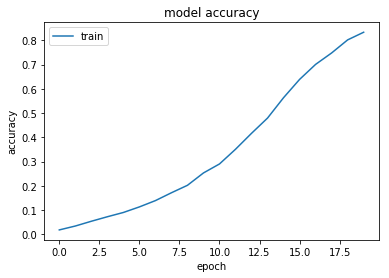

In [30]:
# summarize history for accuracy
plt.plot(model_hist.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


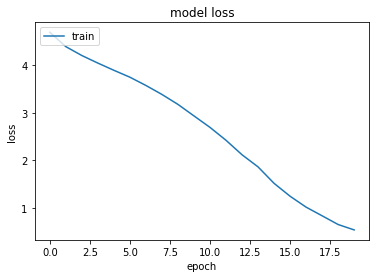

In [31]:
# summarize history for loss
plt.plot(model_hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
submission_data.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,c02cd35494405c5b848c9d1848f3f465,1.100686e-08,2.185987e-12,9.941609e-09,5.037698e-14,6.760664e-11,3.870891e-19,8.728989e-13,5.753289e-17,5.126108e-13,5.119758e-16,2.263437e-08,9.207937e-15,1.739572e-13,8.432168e-17,3.163479e-18,2.900646e-11,1.009139e-12,5.934898e-10,5.082065e-13,2.723250e-07,7.585696e-10,2.473698e-10,6.618208e-13,6.675818e-07,4.137131e-13,1.345507e-09,1.453148e-01,2.923470e-14,2.351027e-11,2.029562e-08,3.467407e-09,3.780500e-12,4.281963e-04,1.155398e-12,2.309683e-15,1.567023e-05,6.254615e-20,3.451369e-15,6.914018e-12,...,7.247971e-03,4.599579e-14,4.769494e-04,2.557397e-10,1.797985e-13,7.847693e-07,1.521611e-10,1.252047e-09,1.261973e-02,4.245227e-14,2.300496e-13,5.761085e-17,1.314249e-12,1.068829e-08,4.584815e-09,1.002055e-10,4.684602e-07,3.452820e-10,9.401949e-11,6.618895e-15,5.590791e-03,2.739319e-05,2.503842e-09,5.531434e-07,4.035863e-10,1.221668e-09,2.988892e-09,7.726817e-14,2.224295e-08,1.424137e-05,1.039131e-08,1.395383e-13,4.587219e-17,3.918930e-17,5.492358e-05,1.714630e-15,6.451920e-11,5.588168e-11,3.727282e-11,1.392223e-12
1,a249e1b6752e56145f24f8cc4c8ccae8,1.025516e-10,5.707127e-11,7.361110e-01,2.268050e-07,1.403237e-09,2.088713e-07,3.713984e-10,4.058095e-04,5.381005e-09,1.667729e-03,8.253077e-10,3.689978e-09,2.784598e-09,3.807837e-07,4.039127e-10,1.831846e-01,3.407261e-07,3.627797e-10,2.424382e-07,1.682763e-06,3.330914e-10,2.658949e-08,7.710395e-11,6.493776e-13,3.504617e-11,4.437469e-09,5.234780e-10,7.288698e-05,2.425210e-05,2.656363e-03,3.468265e-13,5.209541e-10,7.732731e-07,1.820783e-05,4.306630e-13,2.567738e-10,5.891374e-09,2.755860e-07,3.157311e-05,...,1.963691e-07,2.701860e-13,5.543441e-11,2.366960e-10,1.398937e-06,3.407745e-11,9.249048e-08,8.058953e-15,1.357876e-04,5.631159e-10,8.298881e-07,1.614827e-09,1.033773e-08,2.161984e-02,3.739500e-11,1.662233e-13,3.232752e-14,9.038358e-07,6.737780e-13,3.685445e-07,1.970427e-08,3.463581e-06,1.073493e-08,5.608416e-09,1.853649e-06,1.251570e-06,5.845316e-09,5.565705e-13,7.758160e-08,1.997822e-06,4.290672e-11,8.543297e-04,8.454550e-13,2.192105e-03,1.812240e-04,3.339602e-08,3.825972e-13,3.315948e-02,1.026888e-10,1.106805e-08
2,a0748da509a0111df34573d19701232e,8.872287e-16,1.101479e-12,2.836178e-06,3.447221e-09,8.734178e-10,1.537091e-05,1.449702e-08,1.879677e-05,4.515864e-07,1.279863e-07,5.936247e-16,3.418508e-06,2.014803e-01,1.309459e-15,3.774222e-05,1.407822e-08,5.381953e-11,9.976974e-13,1.366724e-13,8.085602e-12,1.007108e-16,4.906774e-05,4.136858e-07,3.243691e-14,1.990018e-23,6.320624e-15,4.084491e-19,1.412643e-11,2.186653e-09,4.129055e-07,4.813241e-18,2.863354e-22,3.746301e-16,4.532954e-13,4.199566e-12,1.640762e-18,1.670725e-18,3.540000e-08,1.257559e-04,...,1.696141e-19,6.529647e-16,5.362752e-22,2.122766e-10,2.799973e-13,2.515054e-14,2.152429e-15,2.520506e-17,8.203157e-13,1.141269e-06,3.731044e-05,2.655414e-03,1.086506e-11,1.126798e-08,4.919726e-16,8.205552e-13,1.299